In [2]:
import sys
import os

# Get the absolute path to the notebook's directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
# Add the project root (parent of notebook dir) to Python path
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

In [3]:
import matplotlib.pyplot as plt

In [4]:

from data.dataset import TUMTraf


In [43]:


from pathlib import Path

data_dir_val = Path(project_root) / "data" / "TUMTraf_Event_Dataset" / "val"

rgb_val_data = str(data_dir_val / "images" / "rgb")
eb_val_data = str(data_dir_val / "images" / "eb_transformed")

rgb_val_label = str(data_dir_val / "OPENLabel_labels_rgb")
eb_val_label = str(data_dir_val / "OPENLabel_labels_eb")

tumtraf_rbg_val_dataset = TUMTraf(img_dir=rgb_val_data, label_dir=rgb_val_label)
tumtraf_eb_val_dataset = TUMTraf(img_dir=eb_val_data, label_dir=eb_val_label)

In [44]:

print ("for rgb")
img, label = tumtraf_rbg_val_dataset[3]
print(img.shape)

print ("for eb")
img_eb, label_eb = tumtraf_eb_val_dataset[3]
print(img_eb.shape)

for rgb
torch.Size([3, 480, 640])
for eb
torch.Size([1, 480, 640])


label for rgb

In [45]:
label

{'id': '20231114-083747.170277',
 'data': {'openlabel': {'metadata': {'schema_version': '1.0.0'},
   'coordinate_systems': 332,
   'frames': {'332': {'objects': {'0': {'object_data': {'name': 'TRUCK_0',
        'type': 'TRUCK',
        'bbox': [{'name': 'full_bbox',
          'val': [141, 26, 39, 52],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '1': {'object_data': {'name': 'CAR_1',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [375, 6, 12, 13],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '2': {'object_data': {'name': 'CAR_2',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [274, 45, 27, 26],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '3': {'object_data': {'name': 'CAR_3',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          '

label for eb

In [46]:
label_eb

{'id': '20231114-083747.170277',
 'data': {'openlabel': {'metadata': {'schema_version': '1.0.0'},
   'coordinate_systems': 332,
   'frames': {'332': {'objects': {'0': {'object_data': {'name': 'CAR_0',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [375, 13, 33, 26],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '1': {'object_data': {'name': 'TRUCK_1',
        'type': 'TRUCK',
        'bbox': [{'name': 'full_bbox',
          'val': [143, 31, 61, 62],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '2': {'object_data': {'name': 'CAR_2',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [360, 21, 38, 37],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '3': {'object_data': {'name': 'CAR_3',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          

rgb image

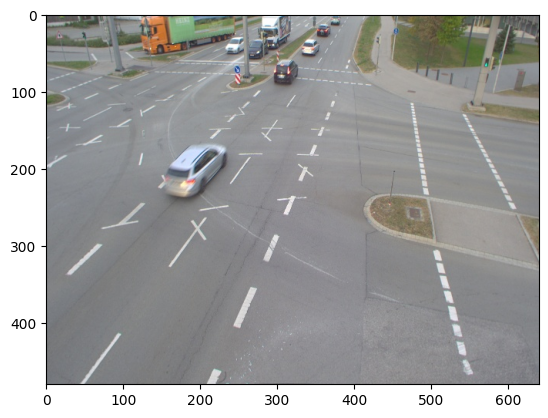

In [47]:


image =  img.numpy().transpose(1, 2, 0)
plt.imshow(image)

eb based image

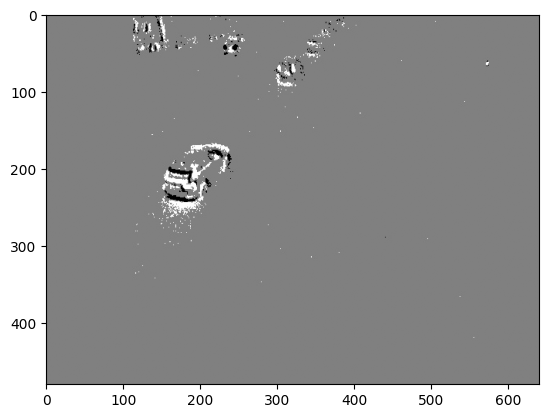

In [48]:
image_eb =  img_eb.numpy().transpose(1, 2, 0)
plt.imshow(image_eb, cmap='gray')

draw the bounding boxes on top of the images

In [49]:
label['data']['openlabel']['frames'].keys()

dict_keys(['332'])

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_boxes_from_openlabel(image, label_data, thickness=2):
    """
    Draw bounding boxes from OPENLabel format
    
    label_data: dict with structure {'data': {'openlabel': {'frames': {...}}}}
    bbox format in OPENLabel: [x_center, y_center, width, height]
    """
    image_copy = image.copy()
    
    # Extract frames from label data
    frames = label_data['data']['openlabel']['frames']
    
    # Get the first frame
    frame_key = list(frames.keys())[0]
    frame = frames[frame_key]
    
    # Extract objects
    objects = frame.get('objects', {})
    
    # Color map for different object types
    color_map = {
        'CAR': (0, 255, 0),      # Green
        'TRUCK': (0, 0, 255),    # Red
        'TRAILER': (255, 0, 0),  # Blue
        'BUS': (255, 255, 0),    # Cyan
        'MOTORCYCLE': (255, 0, 255)  # Magenta
    }
    
    # Draw each object
    for obj_id, obj_info in objects.items():
        object_data = obj_info['object_data']
        obj_type = object_data['type']
        obj_name = object_data['name']
        
        # Get bounding box - find full_bbox
        full_bbox = None
        if "bbox" in object_data and len(object_data["bbox"]) > 0:
            if len(object_data["bbox"]) == 1:
                full_bbox = object_data["bbox"][0]
            else:
                for bbox in object_data["bbox"]:
                    if bbox["name"] == "full_bbox":
                        full_bbox = bbox
                        break
        
        if full_bbox is not None:
            # bbox format: [x_center, y_center, width, height]
            x_center = int(full_bbox["val"][0])
            y_center = int(full_bbox["val"][1])
            width = int(full_bbox["val"][2])
            height = int(full_bbox["val"][3])
            
            # Convert to top-left and bottom-right coordinates
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)
            
            # Get color based on object type
            color = color_map.get(obj_type, (200, 200, 200))
            
            # Draw rectangle
            cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color, thickness)
            
            # Draw label
            label_text = f"{obj_name} ({obj_type})"
            cv2.putText(image_copy, label_text, (x_min, y_min - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    return image_copy



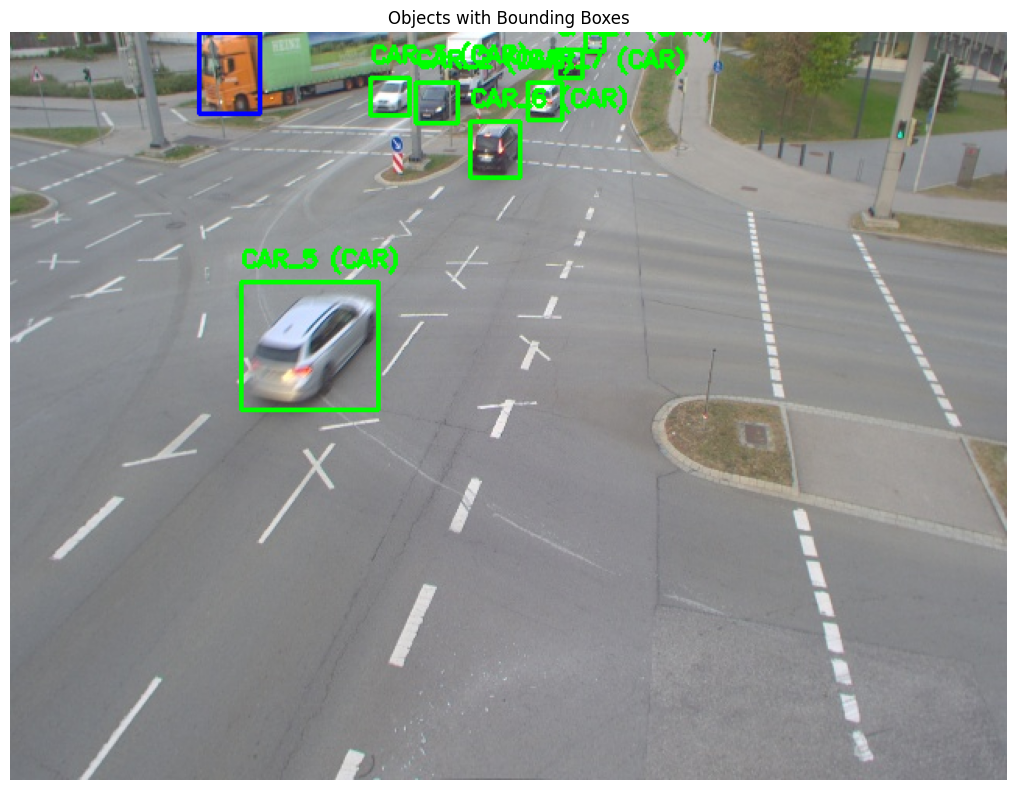

In [51]:
# Usage
result = draw_boxes_from_openlabel(image, label)

plt.figure(figsize=(12, 8))
plt.imshow(result)
plt.title('Objects with Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()

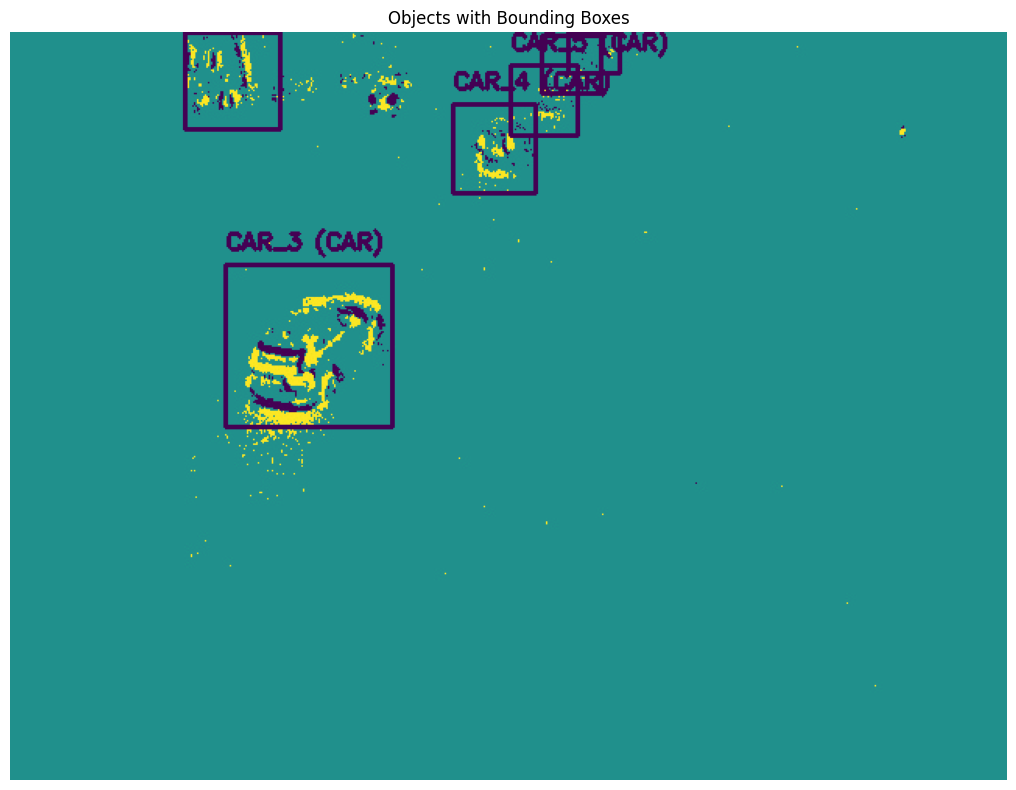

In [52]:
result = draw_boxes_from_openlabel(image_eb, label_eb)

plt.figure(figsize=(12, 8))
plt.imshow(result)
plt.title('Objects with Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()